# Practice Lab: Neural Networks for Handwritten Digit Recognition, Binary

이 연습에서는 신경망을 사용하여 손으로 쓴 숫자 0과 1을 인식합니다.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Neural Networks](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Dataset](#2.2)
  - [ 2.3 Model representation](#2.3)
  - [ 2.4 Tensorflow Model Implementation](#2.4)
    - [ Exercise 1](#ex01)
  - [ 2.5 NumPy Model Implementation (Forward Prop in NumPy)](#2.5)
    - [ Exercise 2](#ex02)
  - [ 2.6 Vectorized NumPy Model Implementation (Optional)](#2.6)
    - [ Exercise 3](#ex03)
  - [ 2.7 Congratulations!](#2.7)
  - [ 2.8 NumPy Broadcasting Tutorial (Optional)](#2.8)


<a name="1"></a>
## 1 - Packages

먼저 아래 셀을 실행하여 이 과제 중에 필요한 모든 패키지를 가져오겠습니다.
- [numpy](https://numpy.org/)는 Python을 사용한 과학 컴퓨팅을 위한 기본 패키지입니다.
- [matplotlib](http://matplotlib.org)는 Python에서 그래프를 그리는 데 널리 사용되는 라이브러리입니다.
- [tensorflow](https://www.tensorflow.org/)는 인기 있는 머신러닝 플랫폼입니다.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

**Tensorflow and Keras**  
Tensorflow는 Google이 개발한 머신러닝 패키지입니다. 2019년에 Google은 Keras를 Tensorflow에 통합하고 Tensorflow 2.0을 출시했습니다. Keras는 François Chollet이 독립적으로 개발한 프레임워크로 Tensorflow에 대한 간단한 레이어 중심 인터페이스를 만듭니다. 이 과정에서는 Keras 인터페이스를 사용합니다.

<a name="2"></a>
## 2 - Neural Networks

과정 1에서는 로지스틱 회귀를 구현했습니다. 이는 다항식 회귀를 사용하여 비선형 경계를 처리하도록 확장되었습니다. 이미지 인식과 같은 훨씬 더 복잡한 시나리오의 경우 신경망이 선호됩니다.

<a name="2.1"></a>
### 2.1 Problem Statement

이 연습에서는 신경망을 사용하여 손으로 쓴 두 숫자(0과 1)를 인식합니다. 이는 이진 분류 작업입니다. 자동 필기 숫자 인식은 오늘날 우편 봉투의 우편번호 인식에서부터 은행 수표에 적힌 금액 인식에 이르기까지 널리 사용됩니다. 향후 과제에서는 이 네트워크를 확장하여 10자리 숫자(0-9)를 모두 인식하게 됩니다.

이 연습에서는 지금까지 배운 방법을 분류 작업에 어떻게 사용할 수 있는지 보여줍니다.

<a name="2.2"></a>
### 2.2 Dataset

이 작업에 대한 데이터 세트를 로드하는 것부터 시작합니다.
- 아래 표시된 `load_data()` 함수는 데이터를 `X` 및 `y` 변수에 로드합니다.


- 데이터 세트에는 손으로 쓴 숫자 $^1$의 1000개 훈련 예제가 포함되어 있으며 여기서는 0과 1로 제한됩니다.

     - 각 훈련 예시는 숫자의 20픽셀 x 20픽셀 회색조 이미지입니다.
         - 각 픽셀은 해당 위치의 회색조 강도를 나타내는 부동 소수점 숫자로 표시됩니다.
         - 20 x 20 픽셀 그리드가 400차원 벡터로 "펼쳐집니다(unrolled)".
         - 각 훈련 예시는 데이터 매트릭스 `X`에서 단일 행이 됩니다.
         - 이는 모든 행이 손으로 쓴 숫자 이미지의 훈련 예제인 1000 x 400 행렬 `X`를 제공합니다.
         
        

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m)}) ---
\end{array}\right)$$

- 훈련 세트의 두 번째 부분은 훈련 세트에 대한 레이블을 포함하는 1000 x 1 차원 벡터 `y`입니다.
     - 이미지가 숫자 `0`이면 `y = 0`, 이미지가 숫자 `1`이면 `y = 1`입니다.

$^1$<sub> 이는 MNIST 필기 숫자 데이터세트(http://yann.lecun.com/exdb/mnist/)의 하위 집합입니다.</sub>


In [2]:
# load dataset
X, y = load_data()

<a name="toc_89367_2.2.1"></a>
#### 2.2.1 View the variables
데이터세트에 대해 좀 더 알아봅시다.
- 시작하기 좋은 곳은 각 변수를 인쇄하고 그 내용을 확인하는 것입니다.

아래 코드는 `X` 및 `y` 변수의 요소를 인쇄합니다.

In [3]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [4]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


<a name="toc_89367_2.2.2"></a>
#### 2.2.2 Check the dimensions of your variables

데이터에 익숙해지는 또 다른 방법은 해당 차원을 보는 것입니다. `X`및 `y` 모양을 인쇄하여 데이터세트에 얼마나 많은 학습 예제가 있는지 확인하세요.


In [5]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


<a name="toc_89367_2.2.3"></a>
#### 2.2.3 Visualizing the Data

훈련 세트의 하위 집합을 시각화하는 것부터 시작합니다.
- 아래 셀의 코드는 `X`에서 64개 행을 무작위로 선택하고 각 행을 다시 20픽셀 x 20픽셀 회색조 이미지로 매핑하고 이미지를 함께 표시합니다.
- 각 이미지의 라벨은 이미지 위에 표시됩니다.

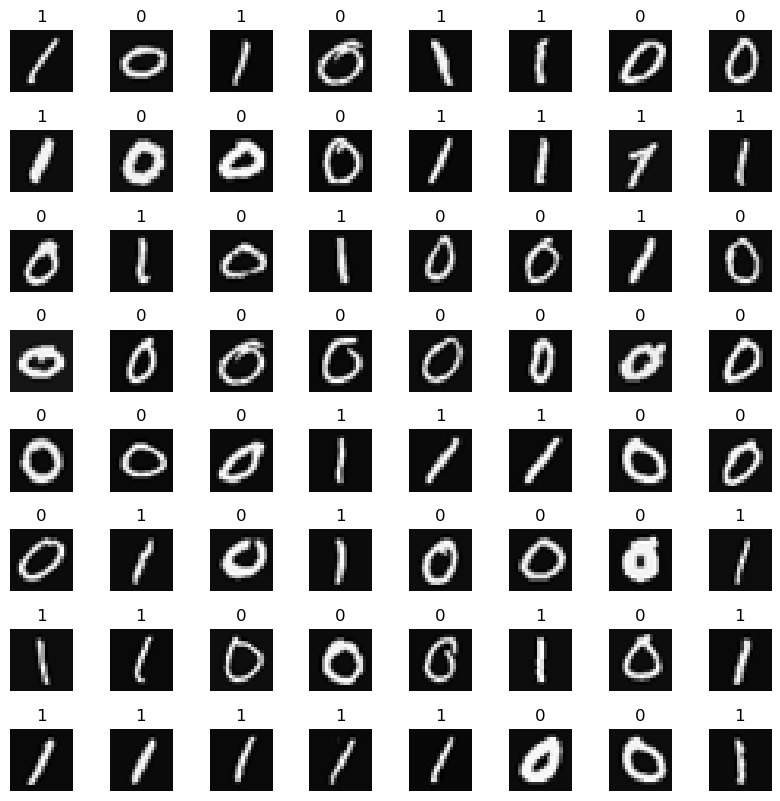

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation

이번 과제에서 사용할 신경망은 아래 그림과 같습니다.
- 시그모이드 활성화를 사용하는 3개의 Dense 레이어가 있습니다.
     - 입력은 숫자 이미지의 픽셀 값이라는 점을 기억하세요.
     - 이미지 크기가 $20\times20$이므로 $400$ 입력이 제공됩니다.
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

- 매개변수에는 레이어 1에 $25$ 유닛, 레이어 2에 $15$ 유닛, 레이어 3에 $1$ 출력 유닛이 있는 신경망 크기가 있습니다.

     - 이러한 매개변수의 크기는 다음과 같이 결정됩니다.
         - 네트워크에 레이어에 $s_{in}$ 유닛이 있고 다음 레이어에 $s_{out}$ 유닛이 있는 경우
             - $W$는 $s_{in} \times s_{out}$ 차원이 됩니다.
             - $b$는 $s_{out}$ 요소가 있는 벡터입니다.
  
     - 따라서 'W'와 'b'의 모양은 다음과 같다.
         - layer1: `W1`의 모양은 (400, 25)이고 `b1`의 모양은 (25,)입니다.
         - layer2: `W2`의 모양은 (25, 15)이고 `b2`의 모양은 (15,)입니다.
         - layer3: `W3`의 모양은 (15, 1)이고 `b3`의 모양은 (1,)입니다.
>**Note:** 편향 벡터 `b`는 1차원(n,) 또는 2차원(n,1) 배열로 표현될 수 있습니다. Tensorflow는 1D 표현을 활용하며 이 실습에서는 해당 규칙을 유지합니다.


<a name="2.4"></a>
### 2.4 Tensorflow Model Implementation


Tensorflow 모델은 레이어별로 구축됩니다. 레이어의 입력 크기($s_{in}$ 위)가 자동으로 계산됩니다. 레이어의 *출력 크기* 를 지정하면 다음 레이어의 입력 크기가 결정됩니다. 첫 번째 레이어의 입력 차원은 아래 `model.fit` 문에 지정된 입력 데이터의 크기에서 파생됩니다.
>**Note:** 첫 번째 레이어의 입력 차원을 지정하는 입력 레이어를 추가하는 것도 가능합니다. 예를 들어:
`tf.keras.Input(shape=(400,)),    #specify input shape`
일부 모델 크기 조정을 설명하기 위해 여기에 이를 포함하겠습니다.


<a name="ex01"></a>
### Exercise 1

아래에서는 시그모이드 활성화와 함께 Keras [Sequential model](https://keras.io/guides/ential_model/) 및 [Dense Layer](https://keras.io/api/layers/core_layers/dense/)를 사용하여 다음을 수행합니다. 위에서 설명한 네트워크를 구성하십시오.


In [7]:
# UNQ_C1
# GRADED CELL: Sequential model

model = Sequential(
    [
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ###
        tf.keras.layers.Dense(25, activation="sigmoid"),
        tf.keras.layers.Dense(15, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ### END CODE HERE ###
    ], name = "my_model"
)


2023-09-16 17:30:31.753662: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-09-16 17:30:31.753738: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-16 17:30:31.753753: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-16 17:30:31.753845: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-16 17:30:31.753887: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>Expected Output (Click to Expand) </b></font></summary>
`model.summary()` 함수는 모델의 유용한 요약을 표시합니다. 입력 레이어 크기를 지정했기 때문에 가중치 및 편향 배열의 모양이 결정되고 레이어당 총 매개변수 수가 표시될 수 있습니다. 레이어 이름은 자동 생성되므로 다를 수 있습니다.
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 25)                10025     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
=================================================================
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________
```

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
As described in the lecture:
    
```python
model = Sequential(                      
    [                                   
        tf.keras.Input(shape=(400,)),    # specify input size (optional)
        Dense(25, activation='sigmoid'),
        Dense(15, activation='sigmoid'),
        Dense(1,  activation='sigmoid')  
    ], name = "my_model"                                    
)                                       
```

In [9]:
# UNIT TESTS
from public_tests import *

test_c1(model)

All tests passed!


요약(summary)에 표시된 매개변수 수는 아래와 같이 가중치 및 편향 배열의 요소 수에 해당합니다.


In [10]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


텐서플로우가 위에서 계산한 것과 동일한 차원을 생성했는지 확인하기 위해 가중치를 더 조사해 보겠습니다.


In [11]:
[layer1, layer2, layer3] = model.layers

In [12]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


**Expected Output**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 1), b3 shape = (1,)
```

`xx.get_weights`는 NumPy 배열을 반환합니다. 텐서 형태로 직접 가중치에 접근할 수도 있습니다. 최종 레이어의 텐서 모양을 확인하세요.

In [13]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.19632342],
       [ 0.33040792],
       [-0.38167572],
       [ 0.52540225],
       [ 0.5102449 ],
       [ 0.08064687],
       [-0.02590537],
       [ 0.48612756],
       [-0.29154292],
       [ 0.46460527],
       [-0.16376579],
       [-0.49331465],
       [-0.02789348],
       [ 0.5944869 ],
       [-0.00960028]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


다음 코드는 손실 함수를 정의하고 경사하강법을 실행하여 모델의 가중치를 훈련 데이터에 맞춥니다. 이에 대해서는 다음 주에 더 자세히 설명하겠습니다.


In [14]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20


2023-09-16 17:32:30.361952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 2s 14ms/step - loss: 0.6135
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.4611
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.3213
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.2186
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1558
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1173
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0921
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0751
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0628
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0535
Epoch 11/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 12/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0409
Epoch 13/20
32/32 [==============================] - 0s 5ms

예측을 위해 예시에서 모델을 실행하려면 [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)를 사용하세요. `predict`에 대한 입력은 배열이므로 단일 예가 2차원으로 재구성됩니다.

In [15]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

2023-09-16 17:32:39.710761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 247ms/step
 predicting a zero: [[0.01685224]]
1/1 [==============================] - 0s 9ms/step
 predicting a one:  [[0.9873223]]


모델의 출력은 확률로 해석됩니다. 위의 첫 번째 예에서 입력은 0 입니다. 모델은 입력이 1 일 확률이 거의 0 에 가깝다고 예측합니다.
두 번째 예에서는 입력이 1입니다. 모델은 입력이 1일 확률이 거의 1이라고 예측합니다.
로지스틱 회귀의 경우와 마찬가지로 확률을 임계값과 비교하여 최종 예측을 합니다.


In [16]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


64 개의 무작위 샘플에 대한 예측과 레이블을 비교해 보겠습니다. 실행하는 데 시간이 걸립니다.

1/1 [==============================] - 0s 10ms/step


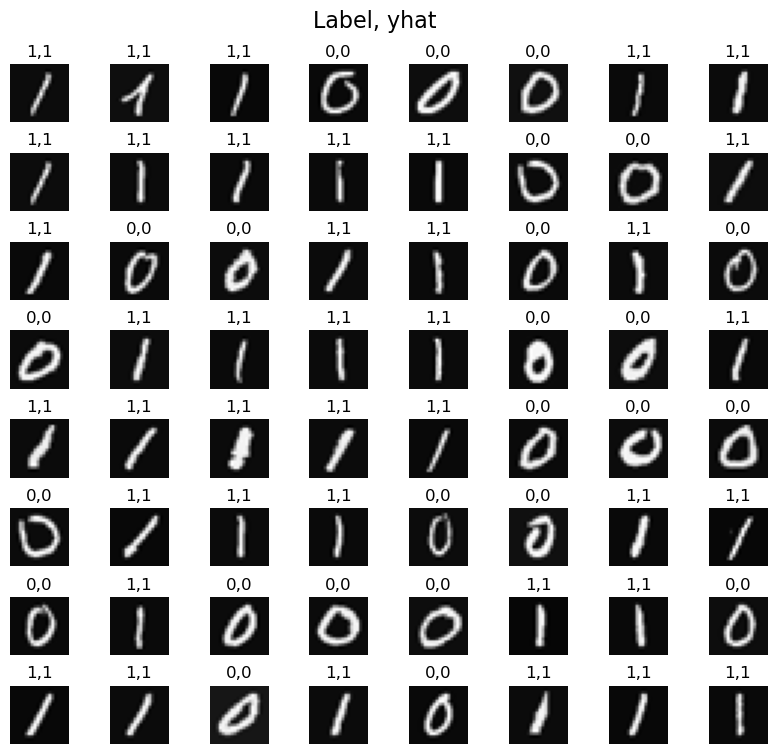

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="2.5"></a>
### 2.5 NumPy Model Implementation (Forward Prop in NumPy)
강의에서 설명했듯이 NumPy를 사용하여 자신만의 Dense Layer를 구축하는 것이 가능합니다. 그런 다음 이를 활용하여 다층 신경망을 구축할 수 있습니다.

<img src="images/C2_W1_dense2.PNG" width="600" height="450">


<a name="ex02"></a>
### Exercise 2

아래에서는 조밀한(dense) 레이어 서브루틴을 빌드합니다. 강의의 예에서는 레이어의 각 유닛(`j`)를 방문하고 `z`를 형성하기위해 해당 유닛에 대한 가중치의 내적(`W[:,j]`)을 수행하고 유닛에 대한 편향(`b[j]`)을 합산하기 위해 for 루프를 활용했습니다. 그런 다음 활성화 함수  `g(z)`가 해당 결과에 적용됩니다. 이 섹션에서는 선택 강의에서 설명한 행렬 연산 중 일부를 활용하지 않습니다. 이에 대해서는 이후 섹션에서 살펴보겠습니다.


In [18]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
### START CODE HERE ###
    for i in range(units):
        w = W[:,i]
        z=np.dot(w,a_in) + b[i]
        a_out[i]=g(z)
### END CODE HERE ###
    return(a_out)


In [19]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


**Expected Output**
```
[0.54735762 0.57932425 0.61063923]
```

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
강의에서 설명한 대로:
    
```python
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):             
        w =                            # Select weights for unit j. These are in column j of W
        z =                            # dot product of w and a_in + b
        a_out[j] =                     # apply activation to z
    return(a_out)
```
   
    
<details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>

    
```python
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):             
        w = W[:,j]                     
        z = np.dot(w, a_in) + b[j]     
        a_out[j] = g(z)                
    return(a_out)
```

In [20]:
# UNIT TESTS
test_c2(my_dense)

All tests passed!


다음 셀은 위의 `my_dense` 서브루틴을 활용하여 3층 신경망을 구축합니다.


In [21]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

Tensorflow에서 훈련된 가중치와 편향을 복사할 수 있습니다.

In [22]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [23]:
# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


다음 셀을 실행하여 Numpy 모델과 Tensorflow 모델 모두의 예측을 확인하세요. 실행하는 데 시간이 걸립니다.

1/1 [==============================] - 0s 10ms/step


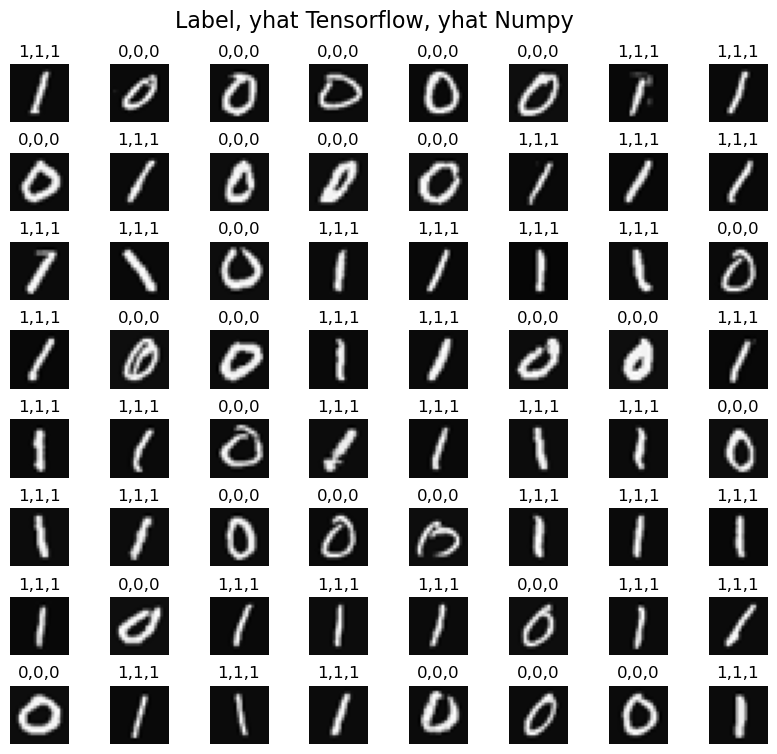

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

<a name="2.6"></a>
### 2.6 Vectorized NumPy Model Implementation (Optional)
선택 강의에서는 계산 속도를 높이는 데 사용할 수 있는 벡터 및 행렬 연산에 대해 설명했습니다.
아래에서는 주어진 입력 예시에서 레이어의 모든 유닛에 대한 출력을 계산하는 레이어 작업을 설명합니다.


<img src="images/C2_W1_VectorMatrix.PNG" width="600" height="450">

위의 예시 `X`와 `W1`, `b1` 매개변수를 사용하여 이를 입증할 수 있습니다. 행렬 곱셈을 수행하기 위해 `np.matmul`을 사용합니다. 참고로 x와 W의 차수는 위 다이어그램에 표시된 대로 호환되어야 합니다.


In [25]:
x = X[0].reshape(-1,1)         # column vector (400,1)
z1 = np.matmul(x.T,W1) + b1    # (1,400)(400,25) = (1,25)
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


한 단계 더 나아가 하나의 행렬-행렬 연산으로 모든 예의 모든 유닛을 계산할 수 있습니다.

<img src="images/C2_W1_MatrixMatrix.PNG" width="600" height="450">
전체 연산은 $\mathbf{Z}=\mathbf{XW}+\mathbf{b}$입니다. 이는 NumPy 브로드캐스팅을 활용하여 $\mathbf{b}$를 $m$ 행으로 확장합니다. 이것이 익숙하지 않은 경우 노트북 끝부분에 간단한 튜토리얼이 제공됩니다.


<a name="ex03"></a>
### Exercise 3

아래에서 예제 행렬에 대한 레이어 계산을 수행하는 새로운 `my_dense_v` 서브루틴을 구성하세요. 이것은 `np.matmul()`을 활용합니다.


In [26]:
# UNQ_C3
# GRADED FUNCTION: my_dense_v

def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (ndarray (m,j)) : m examples, j units
    """
### START CODE HERE ###
    A_out = g(np.matmul(A_in,W) + b)

### END CODE HERE ###
    return(A_out)

In [27]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

tf.Tensor(
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]], shape=(4, 3), dtype=float64)


**Expected Output**

```
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]
 ```

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    행렬 형식에서는 한 줄 또는 두 줄로 작성할 수 있습니다.
    
       Z = np.matmul of A_in and W plus b    
       A_out is g(Z)  
<details>
  <summary><font size="3" color="darkgreen"><b>Click for code</b></font></summary>

```python
def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j,1)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (ndarray (m,j)) : m examples, j units
    """
    Z = np.matmul(A_in,W) + b    
    A_out = g(Z)                 
    return(A_out)
```


In [28]:
# UNIT TESTS
test_c3(my_dense_v)

All tests passed!


다음 셀은 위의 `my_dense_v` 서브루틴을 활용하여 3층 신경망을 구축합니다.

In [29]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

Tensorflow에서 훈련된 가중치와 편향을 다시 복사할 수 있습니다.

In [30]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

새 모델을 사용하여 예측해 보겠습니다. 이렇게 하면 *모든 예를 한 번에* 예측할 수 있습니다. 출력의 모양을 확인하십시오.


In [31]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

TensorShape([1000, 1])

이전과 마찬가지로 임계값 0.5를 적용하지만 모든 예측에 동시에 적용합니다.

In [32]:
Yhat = (Prediction >= 0.5).numpy().astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


예측을 보려면 다음 셀을 실행하세요. 위에서 계산한 예측을 사용합니다. 실행하는 데 시간이 걸립니다.

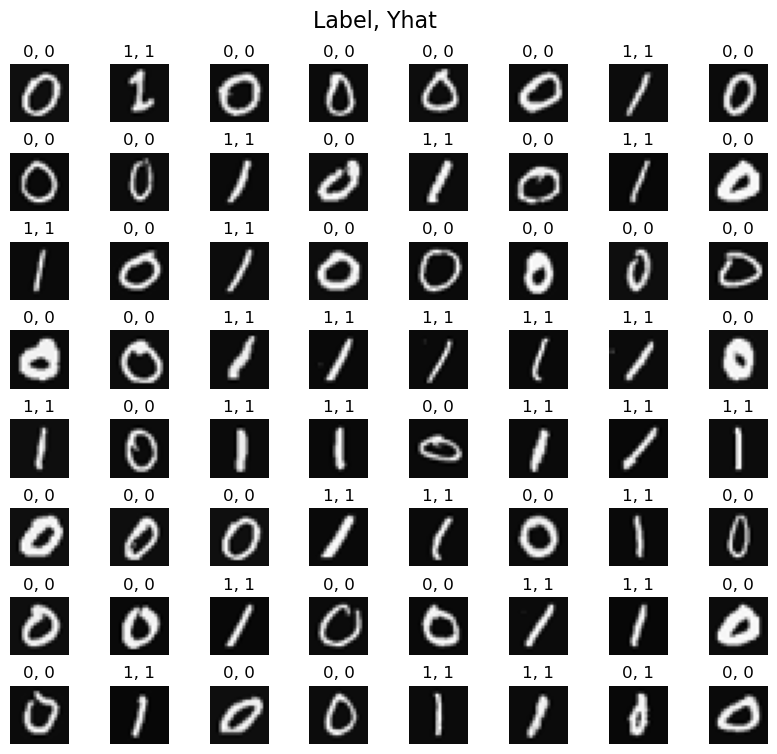

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off()
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

잘못 분류된 이미지 중 하나가 어떻게 보이는지 확인할 수 있습니다.

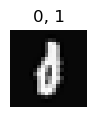

In [34]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()

<a name="2.7"></a>
### 2.7 Congratulations!
신경망을 성공적으로 구축하고 활용했습니다.

<a name="2.8"></a>
### 2.8 NumPy Broadcasting Tutorial (Optional)


마지막 예에서 $\mathbf{Z}=\mathbf{XW} + \mathbf{b}$는 NumPy 브로드캐스팅을 활용하여 $\mathbf{b}$ 벡터를 확장했습니다. NumPy Broadcasting에 익숙하지 않은 경우 이 짧은 튜토리얼이 제공됩니다.

$\mathbf{XW}$는 차원이 $(m,j_1)(j_1,j_2)$인 행렬-행렬 연산으로 결과적으로 차원이 $(m,j_2)$인 행렬이 생성됩니다. 여기에 $(1,j_2)$ 차원을 가진 벡터 $\mathbf{b}$를 추가합니다. 이 요소별 연산이 이해되려면 $\mathbf{b}$가 $(m,j_2)$ 행렬로 확장되어야 합니다. 이 확장은 NumPy 브로드캐스팅을 통해 수행됩니다.


브로드캐스트는 요소별 작업에 적용됩니다.
기본 연산은 더 큰 차원과 일치하도록 요소를 복제하여 더 작은 차원을 '확장'하는 것입니다.

더 자세히 [구체적으로](https://NumPy.org/doc/stable/user/basics.broadcasting.html):
두 개의 배열에서 작업할 때 NumPy는 해당 모양을 요소별로 비교합니다. 후행(즉, 가장 오른쪽) 차원에서 시작하여 왼쪽으로 진행됩니다. 두 차원은 다음과 같은 경우에 호환됩니다.
- 그들은 동등하다, 또는
- 그 중 하나는 1

이러한 조건이 충족되지 않으면 배열에 호환되지 않는 모양이 있음을 나타내는 ValueError: 피연산자를 함께 브로드캐스트할 수 없습니다 예외가 발생합니다. 결과 배열의 크기는 입력의 각 축을 따라 1이 아닌 크기입니다.

여기 몇 가지 예가 있어요.


<figure>
    <center> <img src="./images/C2_W1_Assign1_BroadcastIndexes.PNG"  alt='missing' width="400"  ><center/>
    <figcaption>Calculating Broadcast Result shape</figcaption>
<figure/>

아래 그래픽은 확장 차원을 설명합니다. 아래 빨간색 텍스트를 참고하세요.


<figure>
    <center> <img src="./images/C2_W1_Assign1_Broadcasting.gif"  alt='missing' width="600"  ><center/>
    <figcaption>Broadcast notionally expands arguments to match for element wise operations</figcaption>
<figure/>

위 그래픽은 NumPy가 최종 작업 전에 일치하도록 인수를 확장하는 것을 보여줍니다. 이는 개념적인 설명임을 참고하세요. NumPy 작업의 실제 메커니즘은 가장 효율적인 구현을 선택합니다.

다음 각 예제에 대해 예제를 실행하기 전에 결과의 크기를 추측해 보십시오.


In [35]:
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

(a + b).shape: (3, 1), 
a + b = 
[[6]
 [7]
 [8]]


이는 모든 요소별 연산에 적용됩니다.

In [36]:
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a * b).shape: {(a * b).shape}, \na * b = \n{a * b}")

(a * b).shape: (3, 1), 
a * b = 
[[ 5]
 [10]
 [15]]


<figure>
    <img src="./images/C2_W1_Assign1_VectorAdd.PNG"  alt='missing' width="740" >
    <center><figcaption><b>Row-Column Element-Wise Operations</b></figcaption></center>
<figure/>

In [37]:
a = np.array([1,2,3,4]).reshape(-1,1)
b = np.array([1,2,3]).reshape(1,-1)
print(a)
print(b)
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

[[1]
 [2]
 [3]
 [4]]
[[1 2 3]]
(a + b).shape: (4, 3), 
a + b = 
[[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]]


이는 위에서 구축한 Dense 레이어의 시나리오입니다. 1차원 벡터 $b$를 (m,j) 행렬에 추가합니다.

<figure>
    <img src="./images/C2_W1_Assign1_BroadcastMatrix.PNG"  alt='missing' width="740" >
    <center><figcaption><b>Matrix + 1-D Vector</b></figcaption></center>
<figure/>